# Exploratory Data Analysis (EDA) of Credit Default Data

 This notebook focuses on performing comprehensive Exploratory Data Analysis (EDA) on the cleaned credit default dataset. The goal is to uncover patterns, identify relationships, and gain insights into the characteristics of clients and their default behavior. These insights will be crucial for guiding feature selection, feature engineering, and model development in subsequent stages of the project.
 
 The key steps in this EDA phase include:
 
 -   **Loading the Cleaned Dataset:** Ensuring we start with well-prepared data from the ETL phase.
 -   **Viewing Data Structure and Summary Statistics:** Getting a high-level overview of the dataset's composition.
 -   **Visualizing Distributions of Key Features:** Understanding the spread and patterns of both numerical and categorical variables.
 -   **Analyzing Correlations:** Identifying relationships between features and, most importantly, with the target variable (`default`).
 -   **Summarizing Key Findings:** Consolidating insights gained from the EDA to inform future steps.


In [73]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.makedirs("../assets/plots", exist_ok=True)

In [74]:
# Load the cleaned dataset from the ETL phase
df = pd.read_csv("../data/inputs/cleaned/cleaned_credit_data.csv")
df.head()

,limit_bal,sex,education,marriage,age,pay_delay_sep,pay_delay_aug,pay_delay_jul,pay_delay_jun,pay_delay_may,...,bill_amount_jun,bill_amount_may,bill_amount_apr,payment_amount_sep,payment_amount_aug,payment_amount_jul,payment_amount_jun,payment_amount_may,payment_amount_apr,default
0,20000.0,female,university,married,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,female,university,single,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,female,university,single,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,female,university,married,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,male,university,married,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##  View Data Structure and Summary Statistics
 
 We begin by examining the overall structure of the DataFrame and generating summary statistics for both numerical and categorical features. This provides a foundational understanding of the data's composition and initial characteristics.


In [75]:
# View structure and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   limit_bal           30000 non-null  float64
 1   sex                 30000 non-null  object 
 2   education           29986 non-null  object 
 3   marriage            29946 non-null  object 
 4   age                 30000 non-null  int64  
 5   pay_delay_sep       30000 non-null  int64  
 6   pay_delay_aug       30000 non-null  int64  
 7   pay_delay_jul       30000 non-null  int64  
 8   pay_delay_jun       30000 non-null  int64  
 9   pay_delay_may       30000 non-null  int64  
 10  pay_delay_apr       30000 non-null  int64  
 11  bill_amount_sep     30000 non-null  float64
 12  bill_amount_aug     30000 non-null  float64
 13  bill_amount_jul     30000 non-null  float64
 14  bill_amount_jun     30000 non-null  float64
 15  bill_amount_may     30000 non-null  float64
 16  bill

In [76]:
# Display summary statistics for numerical features (default behavior of .describe())
df.describe().T # Transpose for better readability with many columns

,count,mean,std,min,25%,50%,75%,max
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_delay_sep,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_delay_aug,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_delay_jul,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_delay_jun,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
pay_delay_may,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
pay_delay_apr,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0
bill_amount_sep,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
bill_amount_aug,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0


In [77]:
# Display summary statistics for categorical features
categorical_cols = ["sex", "education", "marriage"]
df[categorical_cols] = df[categorical_cols].astype("category")
df.describe(include=['category'])

,sex,education,marriage
count,30000,29986,29946
unique,2,5,3
top,female,university,single
freq,18112,14030,15964


### Initial Data Overview and Summary
 
 * **Dataset Dimensions**: The dataset contains 30,000 entries and 25 columns.
 * **Data Types**: As expected from the ETL phase, numerical features are `int64` or `float64`, and categorical features (`sex`, `education`, `marriage`) are correctly identified as `category` type.
 * **Missing Values**: `df.info()` confirms no non-null counts are less than 30,000, indicating no missing values (as handled in the ETL phase).
 * **Numerical Features Insights**:
     * `limit_bal` has a wide range, indicating diverse credit limits, with a high standard deviation.
     * `age` spans from 21 to 79, with an average in the mid-30s.
     * Payment delay columns (`pay_delay_*`) show ranges from -2 (no consumption) to positive values (delays), indicating varying repayment behaviors.
 * **Categorical Features Insights**:
     * `sex`, `education`, `marriage` show their counts and unique values, confirming the successful mapping from numerical codes to descriptive labels. For instance, 'sex' has 2 unique categories, 'education' has 5, and 'marriage' has 3. The `top` and `freq` rows indicate the most common categories.


##  Visualizing Distributions of Numeric Features
 
 Visualizing the distribution of key numerical features helps us understand their spread, central tendency, and identify potential skewness or outliers. This is crucial for deciding on appropriate data transformations (e.g., scaling, binning) before model building.
 
 We'll focus on `age` and `limit_bal` as representative examples.


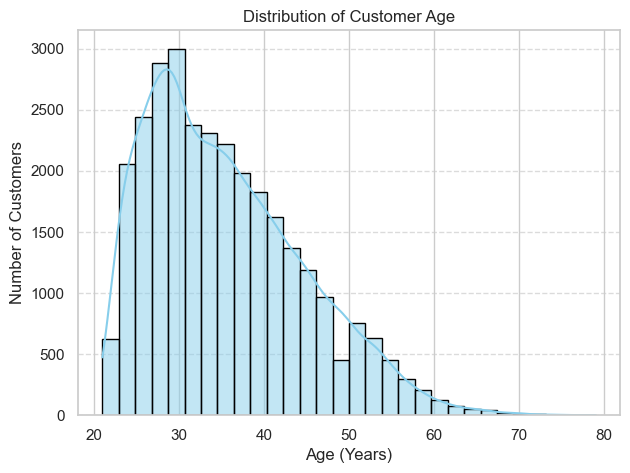

In [78]:
# Plot: Age Distribution
plt.figure(figsize=(7, 5)) 
sns.histplot(df["age"], bins=30, kde=True, edgecolor='black', color='skyblue') 
plt.title("Distribution of Customer Age")
plt.xlabel("Age (Years)")
plt.ylabel("Number of Customers")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("../assets/plots/age_distrib.png") 
plt.show()

### Interpretation: Age Distribution
 
 * The histogram of the `age` feature reveals that the majority of customers fall within the **25 to 40 age range**. This indicates a relatively young to middle-aged client base for this credit card issuer.
 * The distribution shows a gradual decline in client numbers for older age groups, with very few clients above 60.
 * Understanding this demographic spread is valuable for targeted marketing, risk segmentation, and overall business strategy. The distribution appears slightly right-skewed, but generally well-behaved without extreme outliers.


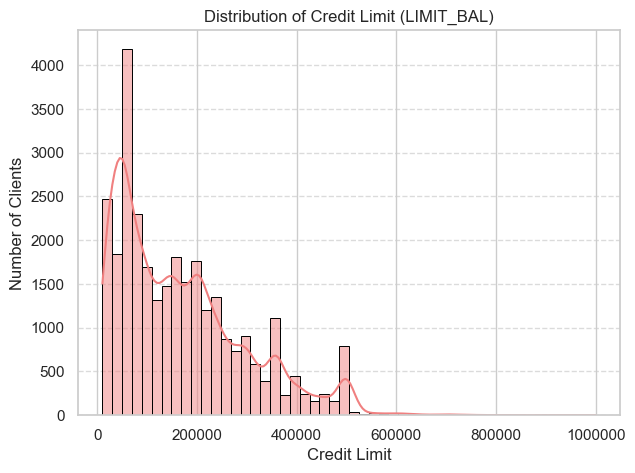

In [79]:
# Plot: Credit Limit (Limit_Bal) Distribution
plt.figure(figsize=(7, 5)) 
sns.histplot(df['limit_bal'], bins=50, kde=True, edgecolor='black', color='lightcoral') 
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.xlabel("Credit Limit")
plt.ylabel("Number of Clients")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='x') 
plt.savefig("../assets/plots/limit_bal_distrib.png")
plt.show()

### Interpretation: Credit Limit Distribution
 
 * The `limit_bal` histogram clearly shows a **strong right-skewed distribution**. This means that a large number of clients have lower credit limits (primarily under 200,000), while a smaller proportion of clients have significantly higher limits (extending up to 1,000,000).
 * This skewness is common in financial datasets and highlights the presence of outliers or "high-value" clients with much larger credit lines.
 * This insight is important for managing financial exposure and may suggest the need for transformations (like log transformation) for this feature if using models sensitive to skewed distributions.


##  Visualizing Categorical Feature Distributions
 
 This section explores the distributions of our cleaned categorical variables. Visualizing these distributions helps us understand the demographic composition of our customer base and validate the effectiveness of our data cleaning and mapping steps. These insights are essential for understanding class balance and informing potential encoding strategies for machine learning models.


C:\Users\abitc\AppData\Local\Temp\ipykernel_24532\1220305103.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sex", data=df, palette="viridis")


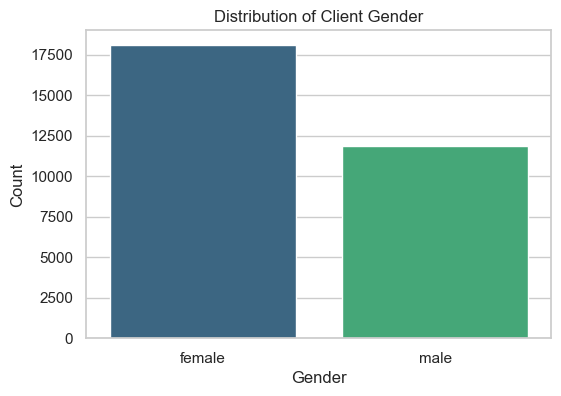

In [80]:
# Set a consistent plot style for categorical plots
sns.set(style="whitegrid")

# Plot 1: Gender Distribution
plt.figure(figsize=(6, 4)) 
sns.countplot(x="sex", data=df, palette="viridis") 
plt.title("Distribution of Client Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("../assets/plots/gender_distribution.png")
plt.show()

### Interpretation: Gender Distribution

 * The plot shows the distribution of clients by gender, which has been successfully mapped to `"male"` and `"female"`.
 * The dataset contains a **slightly higher number of female clients** compared to male clients. This demographic imbalance should be noted, though it's not severe enough to cause immediate concerns for most models.


C:\Users\abitc\AppData\Local\Temp\ipykernel_24532\2721796294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="education", data=df, palette="cividis", order=df['education'].value_counts().index)


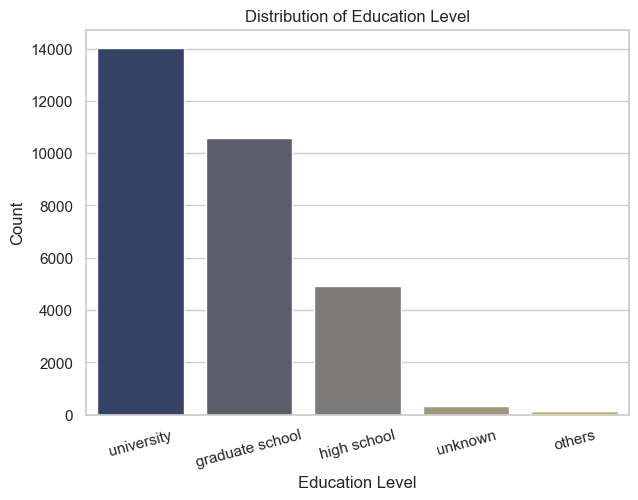

In [81]:
plt.figure(figsize=(7, 5)) 
sns.countplot(x="education", data=df, palette="cividis", order=df['education'].value_counts().index) 
plt.title("Distribution of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=15) 
plt.savefig("../assets/plots/education_distribution.png")
plt.show()

### Interpretation: Education Level Distribution
 
 * The education levels are clearly labeled as `graduate school`, `university`, `high school`, and `others/unknown` (including categories 0, 5, 6 mapped to 'unknown' in ETL).
 * Most clients have a **university education**, followed closely by those with `graduate school` degrees. This suggests a generally well-educated client base.
 * The presence of `high school` and `others/unknown` categories also provides a comprehensive view of the client's educational background. The 'others/unknown' category represents a smaller but non-negligible portion of the dataset.


C:\Users\abitc\AppData\Local\Temp\ipykernel_24532\3158469090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="marriage", data=df, palette="plasma")


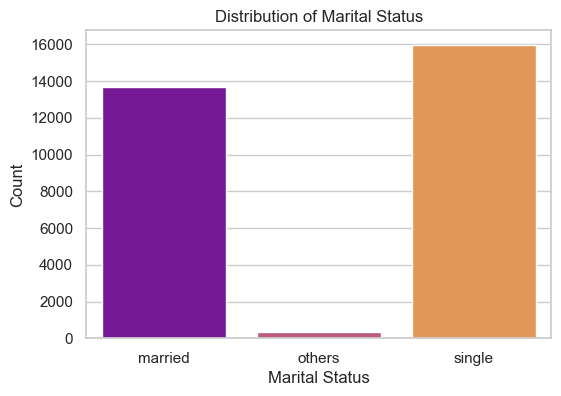

In [82]:
# Plot 3: Marital Status Distribution
plt.figure(figsize=(6, 4)) 
sns.countplot(x="marriage", data=df, palette="plasma")
plt.title("Distribution of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.savefig("../assets/plots/marital_status_distribution.png")
plt.show()

### Interpretation: Marital Status Distribution
 
 * The marital status categories are mapped to `married`, `single`, and `others` (including category 0 mapped to 'unknown').
 * There is a relatively **balanced split between single and married clients**, with `single` clients being slightly more numerous.
 * The `others` category represents a small fraction of the clients. This balanced distribution indicates that marital status could be a relevant feature for distinguishing client behaviors.


## 4. Analyzing Correlations and Relationships
 
 Correlation analysis helps us understand the linear relationships between numerical variables and, crucially, how each feature correlates with our target variable, `default`. This is a vital step for identifying potential predictors and detecting issues like multicollinearity.
 
 ### Process:
 1.  **Compute Correlation Matrix**: Calculate Pearson correlation coefficients for all numerical features.
 2.  **Visualize Heatmap**: Generate a heatmap to visually represent the strength and direction of correlations.
 3.  **Target Variable Correlation**: Extract and sort correlations specifically with the `default` column to pinpoint the most influential features.


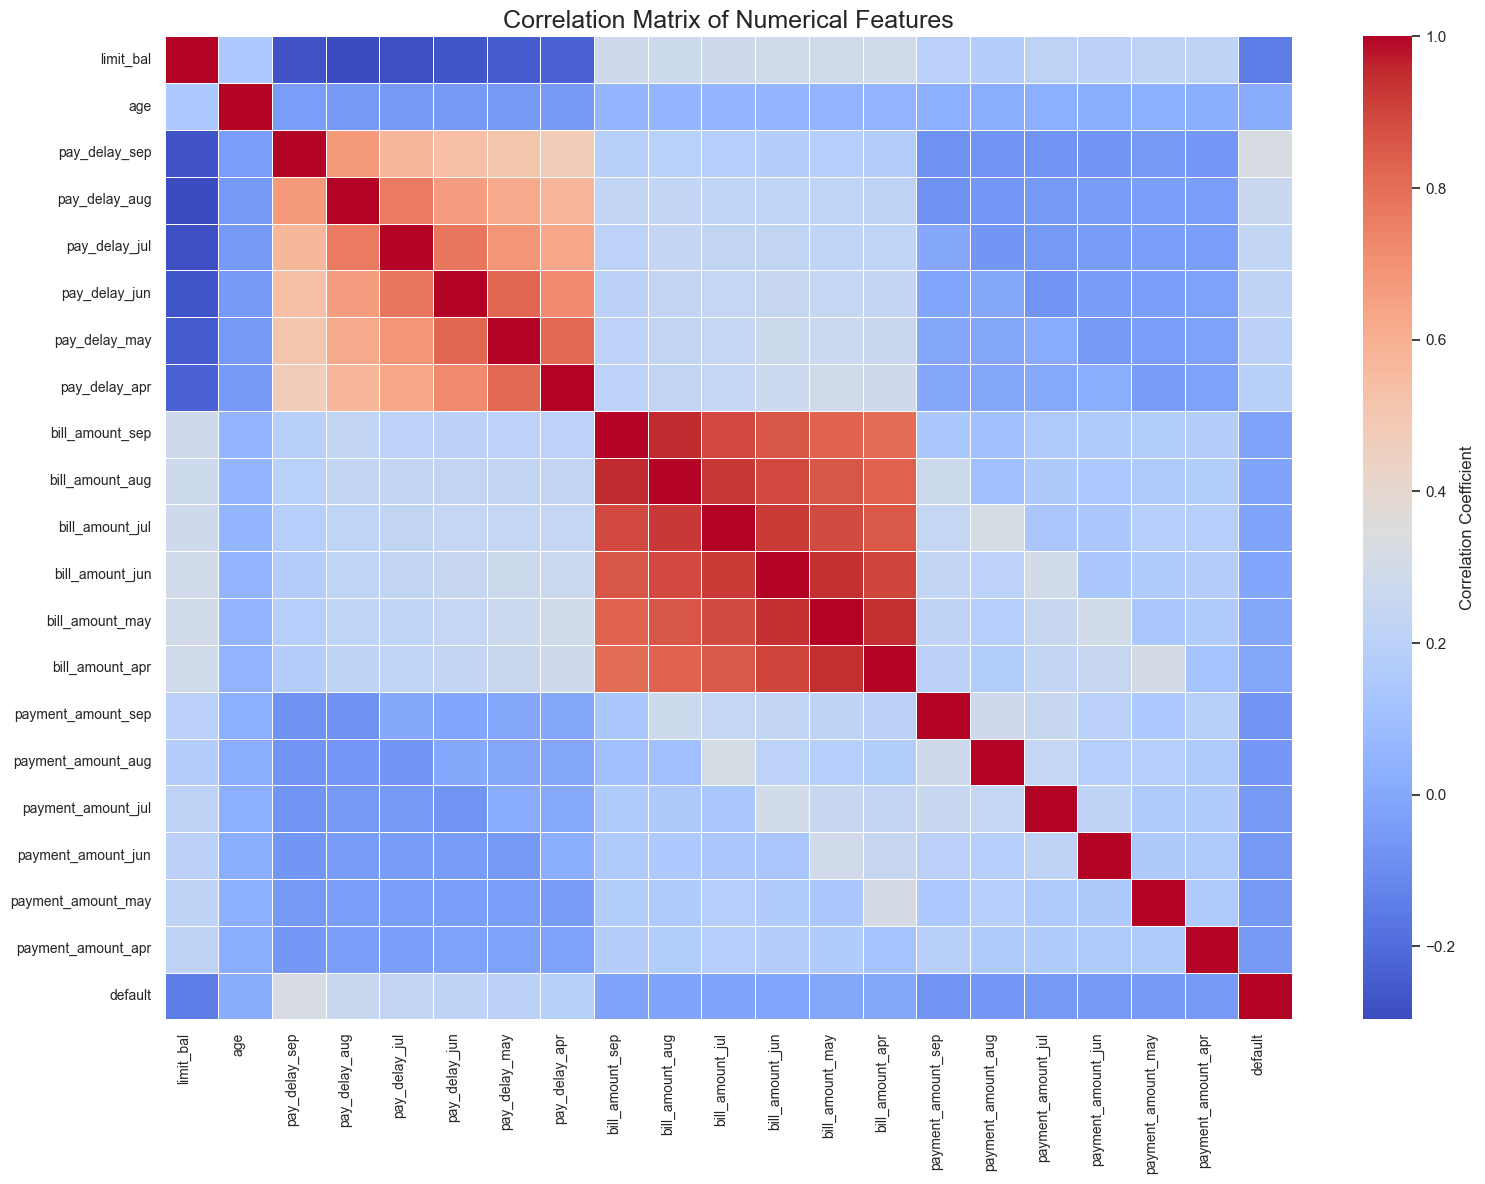

In [83]:
# Compute the correlation matrix for all numerical columns
corr_matrix = df.corr(numeric_only=True)

# Plotting the correlation heatmap
plt.figure(figsize=(16, 12)) 
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5, fmt=".2f",
            cbar_kws={'label': 'Correlation Coefficient'}) 
plt.title("Correlation Matrix of Numerical Features", fontsize=18)
plt.xticks(rotation=90, ha='right', fontsize=10) 
plt.yticks(rotation=0, fontsize=10) 
plt.tight_layout() 
plt.savefig("../assets/plots/correlation_matrix.png")
plt.show()


In [84]:
# Display correlations of all numerical features with the target variable "default"
# Sort in descending order to easily see the strongest relationships
target_corr = corr_matrix["default"].sort_values(ascending=False)
print("Correlation of Features with 'default' Target Variable:\n")
print(target_corr)

Correlation of Features with 'default' Target Variable:

default               1.000000
pay_delay_sep         0.324794
pay_delay_aug         0.263551
pay_delay_jul         0.235253
pay_delay_jun         0.216614
pay_delay_may         0.204149
pay_delay_apr         0.186866
age                   0.013890
bill_amount_apr      -0.005372
bill_amount_may      -0.006760
bill_amount_jun      -0.010156
bill_amount_jul      -0.014076
bill_amount_aug      -0.014193
bill_amount_sep      -0.019644
payment_amount_apr   -0.053183
payment_amount_may   -0.055124
payment_amount_jul   -0.056250
payment_amount_jun   -0.056827
payment_amount_aug   -0.058579
payment_amount_sep   -0.072929
limit_bal            -0.153520
Name: default, dtype: float64


### Interpretation: Correlation Analysis
 
 * **High Positive Correlations with Default**:
     * The `pay_delay_*` columns (repayment status for various months) show the strongest positive correlations with `default`. This is expected: the more months a client delays payment, the higher the likelihood of default. `pay_delay_sep` (the most recent month) has the highest correlation, indicating recent behavior is highly predictive.
 * **High Inter-Feature Correlations**:
     * There are very strong positive correlations among the `pay_delay_*` columns themselves (e.g., `pay_delay_sep` and `pay_delay_aug`). This suggests that payment behavior is consistent over time. It also indicates **multicollinearity**, which might need to be addressed for some models, but tree-based models are typically robust to it.
     * Similarly, `bill_amount_*` columns are highly correlated with each other, as are `payment_amount_*` columns.
 * **Weak/Negative Correlations with Default**:
     * `limit_bal` shows a weak negative correlation, suggesting that higher credit limits are *slightly* associated with a lower default rate.
     * `age` has a very weak negative correlation, reinforcing our earlier Mann-Whitney U test finding that age itself might not be a strong linear predictor of default.
     * The `bill_amount_*` and `payment_amount_*` features also show relatively weak, mostly negative, correlations with default.
 
 These findings are critical for **feature selection**: features highly correlated with `default` (especially `pay_delay_*`) will be important predictors. High inter-feature correlations (multicollinearity) will be noted for model selection and potential regularization strategies.


## EDA Summary: Key Findings & Insights
 
 This Exploratory Data Analysis phase provided a comprehensive understanding of the dataset, highlighting important characteristics and relationships that will inform our machine learning approach.
 
 ### Key Observations:
 
 * **Target Variable (`default`):**
     * The `default` column is binary (0 = no default, 1 = default) and indicates whether the client will default on their payment in the next month.
     * The dataset is imbalanced: approximately **22% of customers defaulted**, while 78% did not. This imbalance will need to be addressed during model training to prevent bias towards the majority class.
 
 * **Numerical Features:**
     * **Age Distribution**: Most clients are in the **25–40 age range**, indicating a younger client demographic. The distribution is relatively balanced.
     * **Credit Limit Distribution (`limit_bal`)**: This feature is **highly right-skewed**, with most clients having lower credit limits. This implies the presence of high-value outliers and suggests potential needs for data transformation (e.g., log-scaling) for certain models.
     * **Bill and Payment Amounts**: These features also showed strong right-skewness, consistent with typical financial data where smaller values are more common and large transactions are outliers.
 
 * **Categorical Features:**
     * **Gender (`sex`)**: There is a **slight majority of female clients** in the dataset.
     * **Education (`education`)**: The client base is predominantly **university graduates or in graduate school**, indicating a generally educated demographic.
     * **Marital Status (`marriage`)**: There is a **roughly balanced split between single and married clients**, with a smaller "others" category.
 
 * **Correlations with Default:**
     * **Payment Delay (`pay_delay_*`) features have the highest positive correlation with default.** This is a crucial insight: a client's recent payment history (especially `pay_delay_sep`) is the strongest indicator of future default.
     * `limit_bal` shows a weak negative correlation with default.
     * `age` shows a very weak negative correlation, suggesting its direct linear relationship with default is minimal.
     * `bill_amount_*` and `payment_amount_*` features generally have very low correlations with default, suggesting that the *amount* itself might be less predictive than the *delay* in payment.
 
 ### Next Steps:
 
 The insights from this EDA phase will directly inform the **Feature Engineering** and **Model Selection** stages. We have identified key predictive features (payment delays), understood the data distributions (skewness), and noted the class imbalance in the target variable. These findings are vital for building an effective credit default prediction model.


##  Save Final Dataset for Modeling
 
 Before proceeding to statistical analysis phase. We then save this finalized dataset, ready for feature scaling, encoding, and model training.


In [85]:
# Save the final cleaned and prepped dataset to a CSV file
# This file will serve as the input for the machine learning modeling notebook.
output_path = "../data/inputs/cleaned/cleaned_credit_data.csv"
df.to_csv(output_path, index=False)
print(f"Final cleaned dataset saved successfully to: {output_path}")

Final cleaned dataset saved successfully to: ../data/inputs/cleaned/cleaned_credit_data.csv
